<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Fraud_Detection_(Muhammad_Shahzad).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']=10,5
Random_seed=50
Labels=['Normal','Fraud']

**Importing the File**

In [ ]:
data=pd.read_csv('/content/Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


**General Information of data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371979 entries, 0 to 2371978
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 199.1+ MB


**Checking the datatype and Null values in data**

In [ ]:
data.isna().sum(), data.dtypes

(step              0
 type              0
 amount            0
 nameOrig          0
 oldbalanceOrg     1
 newbalanceOrig    1
 nameDest          1
 oldbalanceDest    1
 newbalanceDest    1
 isFraud           1
 isFlaggedFraud    1
 dtype: int64, step                int64
 type               object
 amount            float64
 nameOrig           object
 oldbalanceOrg     float64
 newbalanceOrig    float64
 nameDest           object
 oldbalanceDest    float64
 newbalanceDest    float64
 isFraud           float64
 isFlaggedFraud    float64
 dtype: object)

**Treating the missing values**
Majority, we use mode for object datatype while I have used mode for float datatype becuase values are repeated and I also want to aviod the float or number in points and creating an issue for me in EDA.

In [ ]:
data.fillna(data['oldbalanceOrg'].mode()[0], inplace=True)
data.fillna(data['newbalanceOrig'].mode()[0], inplace=True)
data.fillna(data['nameDest'].mode()[0], inplace=True)
data.fillna(data['oldbalanceDest'].mode()[0], inplace=True)
data.fillna(data['newbalanceDest'].mode()[0], inplace=True)
data.fillna(data['isFraud'].mode()[0], inplace=True)
data.fillna(data['isFlaggedFraud'].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Treating the Categorial features **
 I have used label encoder which encodes the data in alphabatical order;
 ['apple','york','book'] will be encoded as [0,2,1] assiging numerice value on alphabatically order.

In [ ]:
label_encoder=LabelEncoder()
data['type']=label_encoder.fit_transform(data['type'])
data['nameOrig']=label_encoder.fit_transform(data['nameOrig'])

**Confirming the datatypes of all feature or columns in dataset are numeric and also checking the shape of data or size**

In [ ]:
data.dtypes, data.shape

(step                int64
 type                int64
 amount            float64
 nameOrig            int64
 oldbalanceOrg     float64
 newbalanceOrig    float64
 nameDest           object
 oldbalanceDest    float64
 newbalanceDest    float64
 isFraud           float64
 isFlaggedFraud    float64
 dtype: object, (2371979, 11))

In [ ]:
data=data.drop(['nameDest'], axis=1)

**EDA Analysis**
Finding the distribution of data based on transactions present in data.

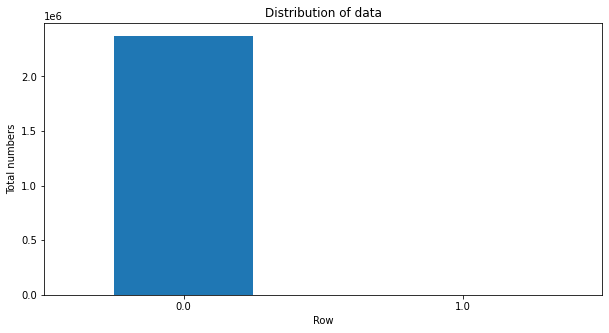

In [ ]:
Count=pd.value_counts(data.isFraud,sort=True)
Count.plot(kind='bar',rot=0)
plt.title('Distribution of data')
plt.xlabel('Row')
plt.ylabel('Total numbers')
plt.show()

**Finding the number of normal and fraud transaction.**

In [ ]:
fraud=data[data.isFraud==1]
normal=data[data.isFraud==0]
print(fraud.shape, normal.shape)

(2168, 10) (2369811, 10)


In [ ]:
fraud.amount.describe().astype(int)

count        2168
mean      1280546
std       2089029
min           119
25%        114017
50%        394886
75%       1457085
max      10000000
Name: amount, dtype: int64

In [ ]:
normal.amount.describe().astype(int)

count    2369811
mean      158629
std       257359
min            0
25%        12868
50%        77669
75%       214538
max      7719103
Name: amount, dtype: int64

We need to analyze more amount of information from the transaction data

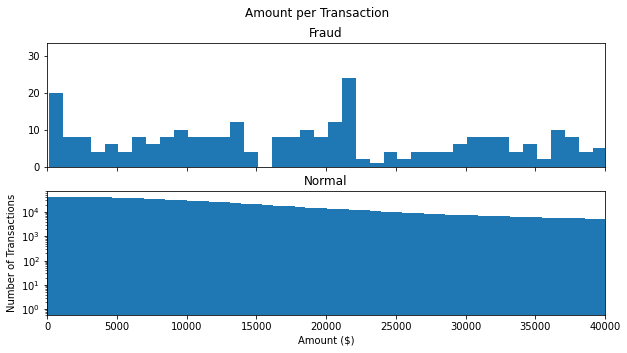

In [ ]:
f, (ax1, ax2)= plt.subplots(2,1, sharex=True)
f.suptitle('Amount per Transaction')
bins=10000
ax1.hist(fraud.amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.xlim(0,40000)
plt.yscale('log')
plt.ylabel('Number of Transactions')
plt.show()

We Will check Do fraudulent transactions occur more often during certain steps

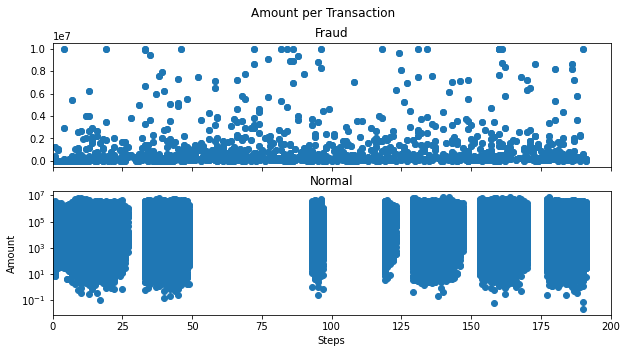

In [ ]:
f, (ax1, ax2)= plt.subplots(2,1, sharex=True)
f.suptitle('Amount per Transaction')
bins=70
ax1.scatter(fraud.step, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(normal.step, normal.amount)
ax2.set_title('Normal')
plt.xlabel('Steps')
plt.ylabel('Amount')
plt.xlim(0,200)
plt.yscale('log')
plt.show()

Finding the Fraud and Valid transactions in data

In [ ]:
Fraud=data[data.isFraud==1]
Valid=data[data.isFraud==0]
outlier_fraction=len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases : ',len(Fraud))
print('Valid Cases : ',len(Valid))

0.0009148408881552157
Fraud Cases :  2168
Valid Cases :  2369811


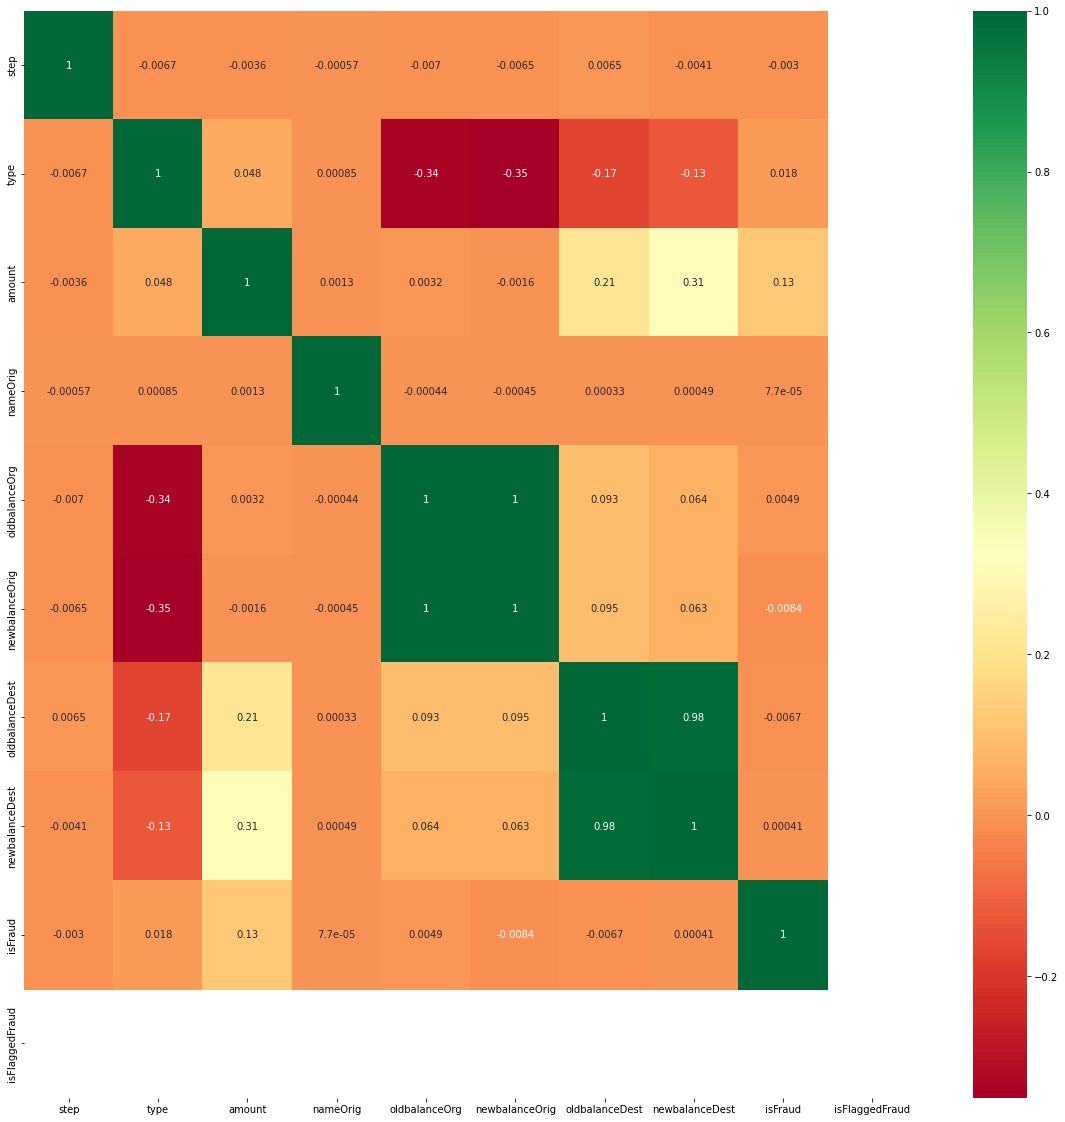

In [ ]:
# Getting correlations of each feature in dataset
relation_matrix=data.corr()
top_correlated_features=relation_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_correlated_features].corr(),annot=True,cmap='RdYlGn')


**Creating the Dependent and Independent Features**

In [ ]:
# creating dependent and independent features
columns =data.columns.tolist()
# Dropping the columns that I do not want to include
columns=[i for i in columns if i not in ['isFraud']]
# Storing the variable that I am going to predict
target='isFraud'
# defining the Random State
state=np.random.RandomState(50)
X=data[columns]
Y=data[target]
Outliers=state.uniform(low=0, high=1, size=(X.shape[0],X.shape[1]))
# printing the Shapes
print(X.shape)
print(Y.shape)

(2371979, 9)
(2371979,)


**Isolation Forest** Fitting the model and making prediction on the trained model.

In [ ]:
isolationForest=IsolationForest(n_estimators=100, max_samples=len(X), contamination=outlier_fraction, random_state=state, verbose=0)
isolationForest.fit(X)
score_prediction=isolationForest.decision_function(X)
y_pred=isolationForest.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Results of Isolation Forest Model

In [ ]:
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1
n_errors=(y_pred !=Y).sum()
print("IsolationForest Error: ",n_errors)
print('IsolationForest Accuracy Score: ', accuracy_score(Y, y_pred))
print('IsolationForest Classification Report: \n',classification_report(Y, y_pred))

IsolationForest Error:  3836
IsolationForest Accuracy Score:  0.9983827850077931
IsolationForest Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2369811
         1.0       0.12      0.12      0.12      2168

    accuracy                           1.00   2371979
   macro avg       0.56      0.56      0.56   2371979
weighted avg       1.00      1.00      1.00   2371979



**Local Outlier Factor** Fitting the Model and Making prediction on trained model.

In [ ]:
localOutlierFactor=LocalOutlierFactor(n_neighbors=25, algorithm='auto',leaf_size=20,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction)
predicted=localOutlierFactor.fit_predict(X)
score_prediction=localOutlierFactor.negative_outlier_factor_

Results of Local Outlier Factor.

In [ ]:
predicted[predicted==1]=0
predicted[predicted==-1]=1
numberOfErrors=(predicted !=Y).sum()
print("Local Outlier Factor Error: ",numberOfErrors)
print('Local Outlier Factor Accuracy Score: ', accuracy_score(Y, predicted))
print('Local Outlier Factor Classification Report: \n',classification_report(Y, predicted))

Local Outlier Factor Error:  4318
Local Outlier Factor Accuracy Score:  0.9981795791615355
Local Outlier Factor Classification Report:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   2369811
         1.0       0.00      0.00      0.00      2168

    accuracy                           1.00   2371979
   macro avg       0.50      0.50      0.50   2371979
weighted avg       1.00      1.00      1.00   2371979



**One ClassSVM** Fitting the model and making prediction on trained model.

In [ ]:
supportVectorMachine=OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05, max_iter=-1)
supportVectorMachine.fit(X)
prediction=supportVectorMachine.predict(X)

Results of One ClassSVM

In [ ]:
prediction[prediction==1]=0
prediction[prediction==-1]=1
total_errors=(predicted !=Y).sum()
print("Local Outlier Factor Error: ",total_errors)
print('Local Outlier Factor Accuracy Score: ', accuracy_score(Y, prediction))
print('Local Outlier Factor Classification Report: \n',classification_report(Y, prediction))
